# Certamen de Simulación Estocástica - Pregunta 3
- Diego Astaburuaga

**III.** En esta pregunta se busca simular funciones de $L^2(\Omega)$. Para esto, recordamos que una función $f(t)\in L^2(\Omega)$ se puede escribir mediante una secuencia de bases ortogonales $\{\phi_i\}_{i=0}^\infty$ y una secuencia de números reales $\{\kappa_i\}_{i=0}^\infty$ como

$$
f(t):=f(t,\{\kappa_i\}_{i=0}^\infty)=\sum_{i=0}^\infty\kappa_i\phi_i(t)
$$

Considernando la secuencia de variables aleatorias independientes $\{S_k\}_{k=0}^\infty$ donde $S_k$ proviene de una distribución $Beta(1-\alpha,\theta +\alpha k)$. Se puede demostrar que el proceso $W_k=S_k\Pi_{i=0}^{k-1}(1-S_i)$ satisface que $W_k>0$ para todo número $k$ y que además $\sum_{k=0}^\infty W_k=1$. Realice las simulaciones:

## a) Simular la secuencia $W_k$ para distintos valores de $\alpha$ y $\theta$. Describa lo observado y fundamente con gráficos apropiados.

Ideas:

- Entender $W_k$ como una serie de tiempo para comparar entre distintos parameters.
    - Trabajar $W_k$ como datos y calcular su varianza y gráficarla versus los parametros.
    - Entender si existe tendencia en $W_k$ para los distintos parametros (considerar log(y)=x+\epsilon).

In [67]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.stats import beta

In [68]:
def simulate_Wk(n_max, alpha, theta, tol=0, n_min=None):
    """
    Simulate an array of W_k values of size n_max based on given specifications.
    
    Args:
        n_max (int): Size of the array.
        alpha (float): Alpha parameter of the beta distribution.
        theta (float): Theta parameter of the beta distribution.
        tol (float): Tolerance for the sum of W_k to reach 1.

    Returns:
        numpy.ndarray: Array of simulated W_k values.
    """

    if n_min is None:
        n_min = n_max
    # Initialize arrays for S_k and W_k
    Sk = []
    Wk = []

    # Simulate the first S_k
    new = beta(1 - alpha, theta).rvs(1)
    Sk.append(new[0])

    # Calculate the first W_k
    Wk.append(Sk[0])

    k = 1

    product_term = 1
    # Continue simulating until the sum of W_k is close to 1
    while (np.abs(1 - np.sum(Wk)) > tol or k < n_min) and k < n_max:
        # Simulate the next S_k
        new = beta(1 - alpha, theta + alpha * k).rvs(1)
        Sk.append(new[0])

        # Calculate the next W_k
        product_term *= (1 - Sk[k-1])
        Wk.append(Sk[k] * product_term)
        
        k += 1

    # Return the simulated W_k values
    return Wk

# Define the parameters
n_max = 1_000
alpha = 0.5
theta = 5.0

# Simulate W_k values
Wk = simulate_Wk(n_max, alpha, theta, tol = 0.1, n_min = 10)

# Calculate the difference between the sum of W_k and 1
difference = np.abs(np.sum(Wk) - 1)

#Calculate the len
k = len(Wk)

# Print the result
print(f'Difference between the sum of W_k and 1: {difference:.4f} con {k=}')

Difference between the sum of W_k and 1: 0.0992 con k=153


Note que en $Beta(1-\alpha,\theta +\alpha k)$, existe la condición de que las entradas de la distribución deben ser no negativos para todo $k\in \mathbb{N}$, por lo tanto $\alpha\in(0,1)$ y $\theta>0$

Notese que para varios posibles valores de $\alpha$ y $\theta$ se debería verificar computacionalmente que la suma de la sucesión $W_k$ efectivamente da 1, como son terminos positivos y estamos truncando la sucesión, esta debería ser cercana 1, en efecto:

experimentando con distintos largos de la cadena $W_k$ se deduce que para tener una cadena significativa en el sentido que todos los valores sumen 1 aproximadamente, hay que trabajar con valores altos. En lo siguiente se puede deducir que según los valores de $\theta$ y $\alpha$, se requieren más o menos valores para alcanzar la tolerancia.

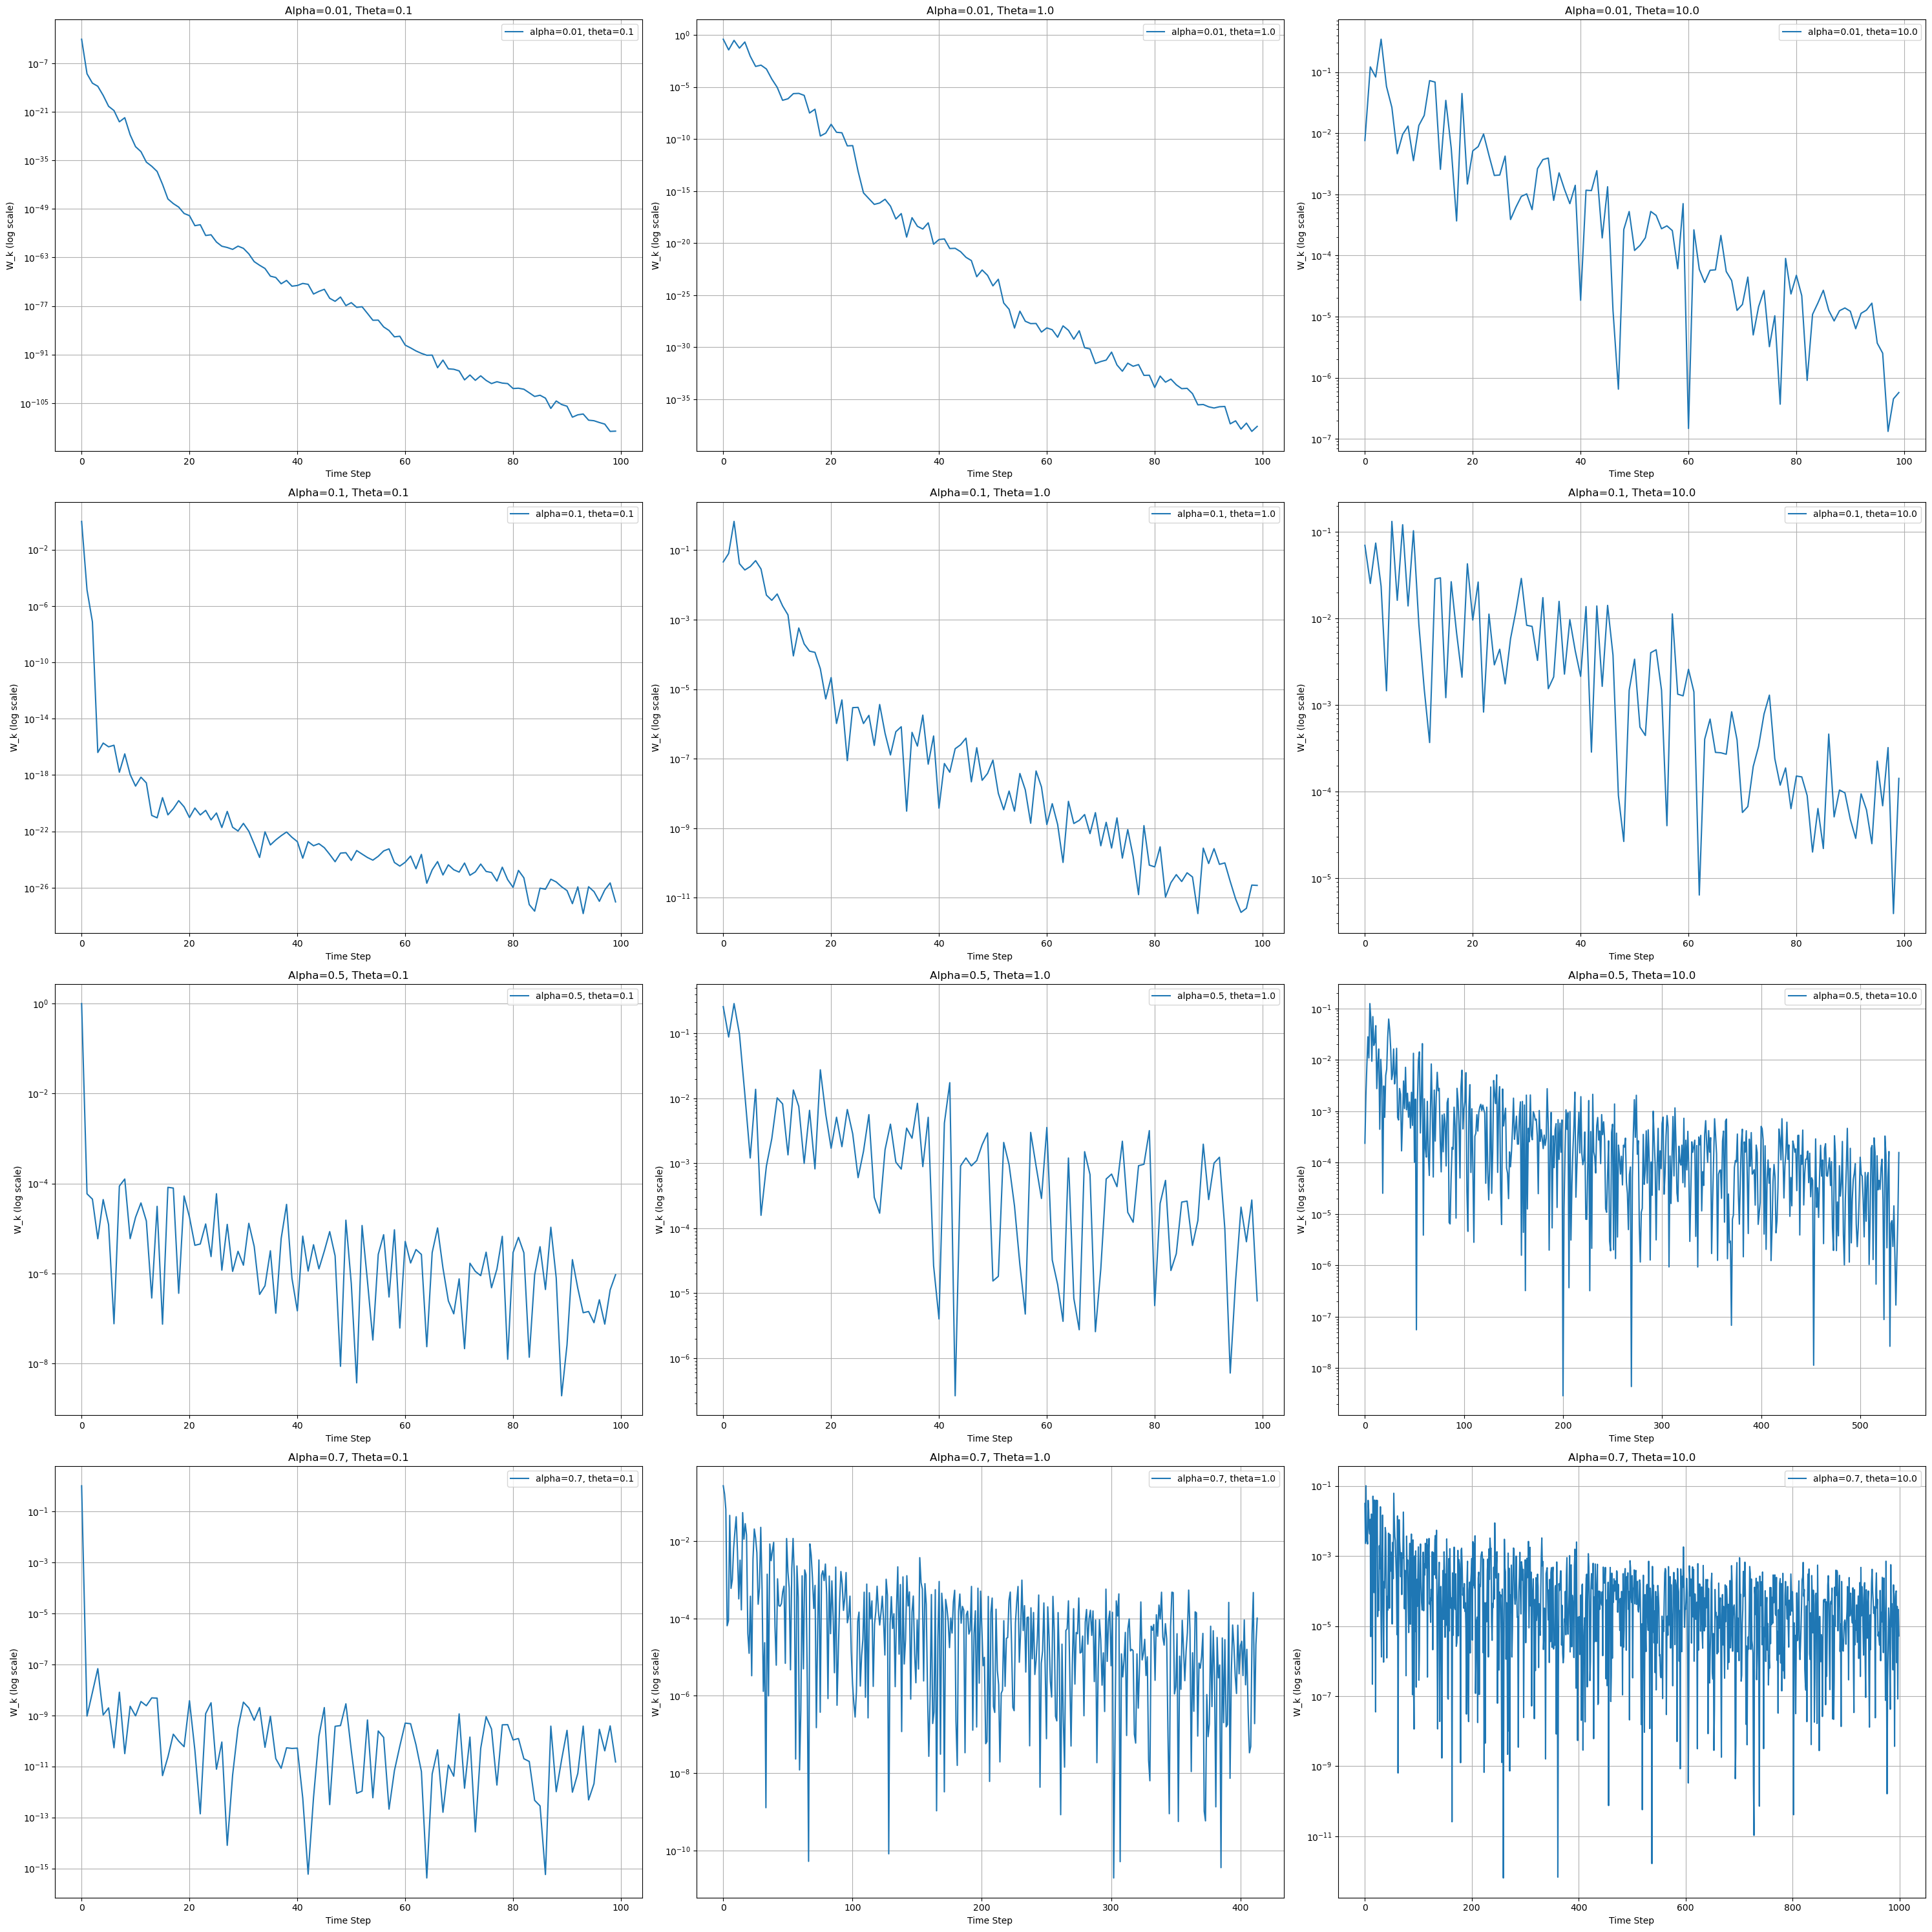

In [69]:
# Definir parámetros y configuración
n_max = int(1e3)  # Tamaño maximo de la serie de tiempo
alpha_grid = [0.01, 0.1, 0.5, 0.7]  # Valores de alpha
theta_grid = np.logspace(-1, 1, 3 )  # Valores de theta

num_plots = len(alpha_grid) * len(theta_grid)  # Número total de gráficos

# Crear subplots para cada combinación de alpha y theta
fig, axes = plt.subplots(len(alpha_grid), len(theta_grid), figsize=(30, 30))

# Iterar a través de los valores de alpha y theta
for i, alpha in enumerate(alpha_grid):
    for j, theta in enumerate(theta_grid):
        # Simular la serie de tiempo utilizando simulate_Wk
        Wk = simulate_Wk(n_max, alpha, theta, tol=0.05, n_min=100)
        
        # Graficar la serie de tiempo en el subplot correspondiente
        ax = axes[i, j]
        ax.plot(np.arange(len(Wk)), Wk, label=f'alpha={alpha}, theta={theta}')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('W_k (log scale)')
        ax.set_yscale('log')  # Establecer escala logarítmica en el eje Y
        ax.set_title(f'Alpha={alpha}, Theta={theta}')
        ax.grid(True)
        ax.legend()

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

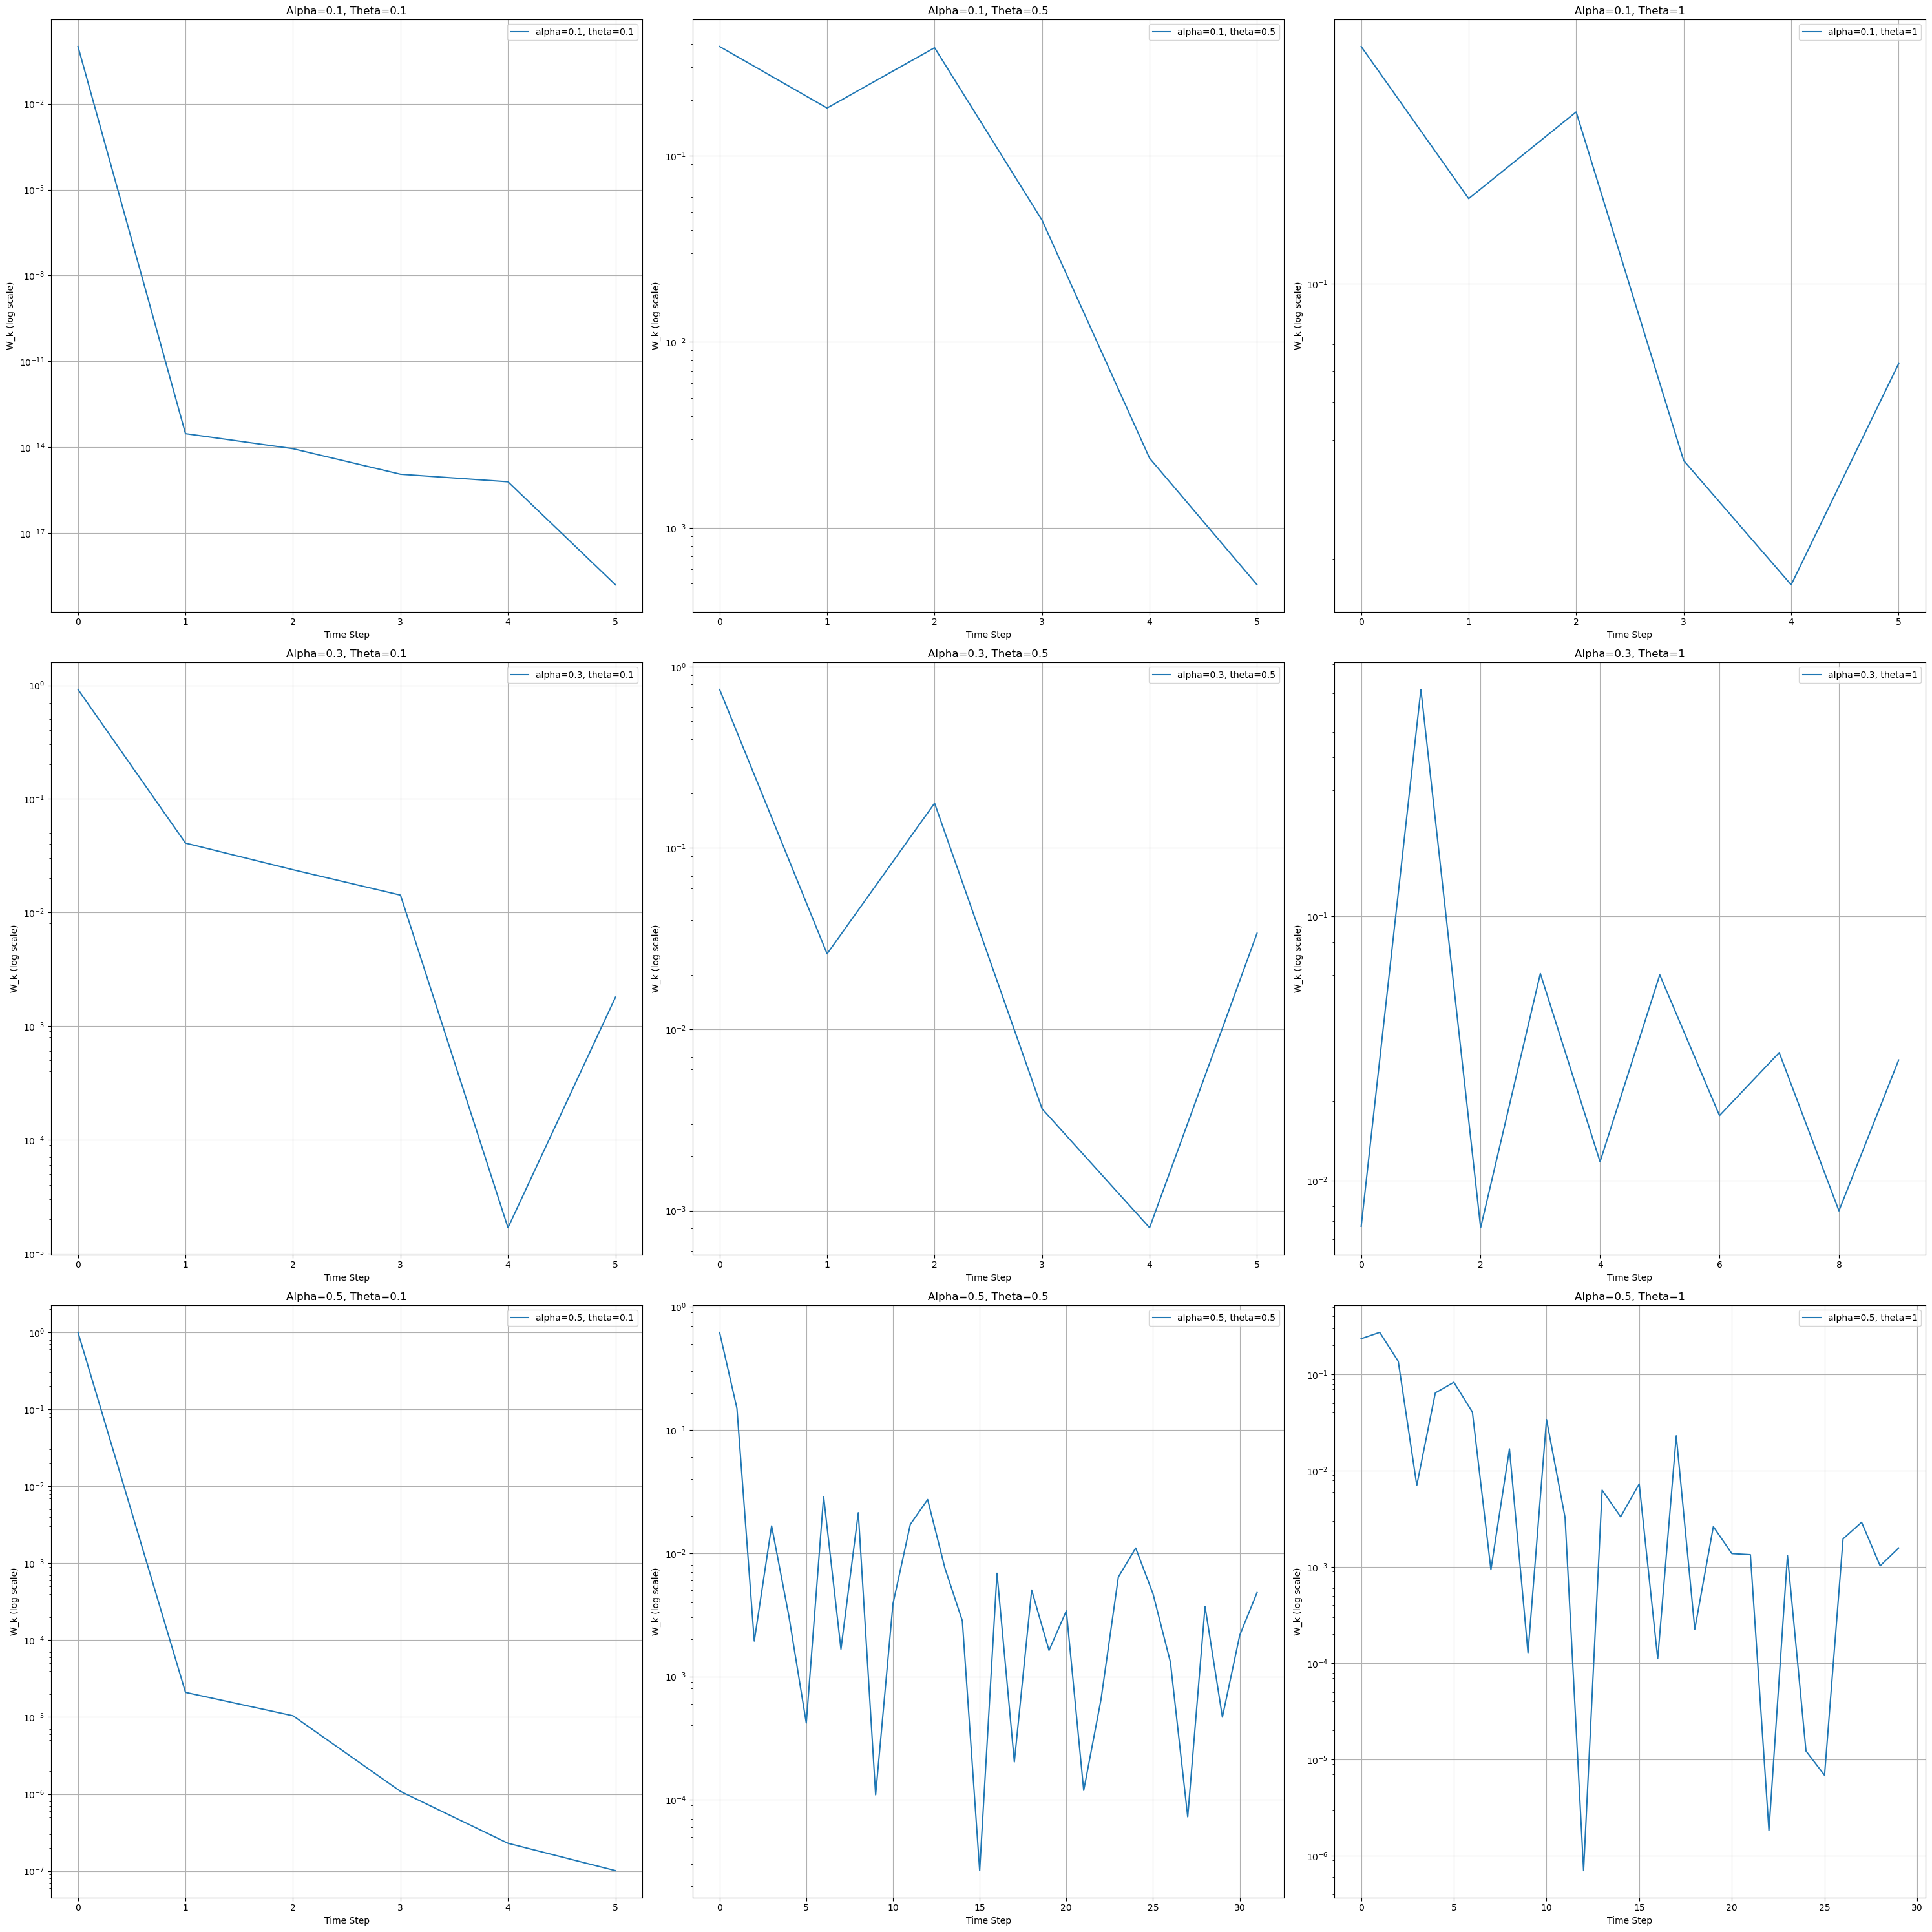

In [70]:
# Definir parámetros y configuración
n_max = 100  # Tamaño maximo de la serie de tiempo
alpha_grid = [0.1, 0.3, 0.5]  # Valores de alpha
theta_grid = [0.1, 0.5, 1]  # Valores de theta

num_plots = len(alpha_grid) * len(theta_grid)  # Número total de gráficos

# Crear subplots para cada combinación de alpha y theta
fig, axes = plt.subplots(len(alpha_grid), len(theta_grid), figsize=(30, 30))

# Iterar a través de los valores de alpha y theta
for i, alpha in enumerate(alpha_grid):
    for j, theta in enumerate(theta_grid):
        # Simular la serie de tiempo utilizando simulate_Wk
        Wk = simulate_Wk(n_max, alpha, theta, tol=0.05, n_min=5+1)
        
        # Graficar la serie de tiempo en el subplot correspondiente
        ax = axes[i, j]
        ax.plot(np.arange(len(Wk)), Wk, label=f'alpha={alpha}, theta={theta}')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('W_k (log scale)')
        ax.set_yscale('log')  # Establecer escala logarítmica en el eje Y
        ax.set_title(f'Alpha={alpha}, Theta={theta}')
        ax.grid(True)
        ax.legend()

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

En efecto convergen rápido.

- Valores con serie que llegan a 1000 significa que no alcazarón la convergencia a 1 con una tolerancia de $0.05$.
- Se observa que para $\alpha\geq 0.8$ hay una clara convergencia lenta, por ende por el bien del computo, se usarán valores de $\alpha$ que permitan tener una convergencia rapida, es decir, $\alpha\leq 0.5$.
- Mediante varios ejemplos de simulación como el anterior, se considerará que utilizar $\alpha \in (0,0.5)$ por la convergencia que presenta para $\theta$ en el rango mostrado.
- Se observa que de forma clara, a mayor $\theta$, mayor es la cantidad de iteraciones necesarias hasta alcanzar la convergencia.
- Se pueden hacer experimentos exhaustivos de simulación para determinar el número esperado de simulaciones para alcanzar una cierta tolerancia dados parámetros $\alpha$ y $\theta$, los cuales no se realizan el favor de la longitud del documento.

Importante: A partir de ahora y según lo observado en los puntos anteriores, utilizaremos $\alpha\in (0.1, 0.5]$ y $\theta \in (0,10]$ en favor de los tiempos de computo y velocidad de convergencia de $W_k$.

Además viendo el gráfico generado, se puede conjeturar que el valor de $\alpha$ determina en cierta forma que tan rápido decrecen los valores de la sucesión $W_k$ mientras que $\theta$ parece que al ser mayor aumenta la varianza...

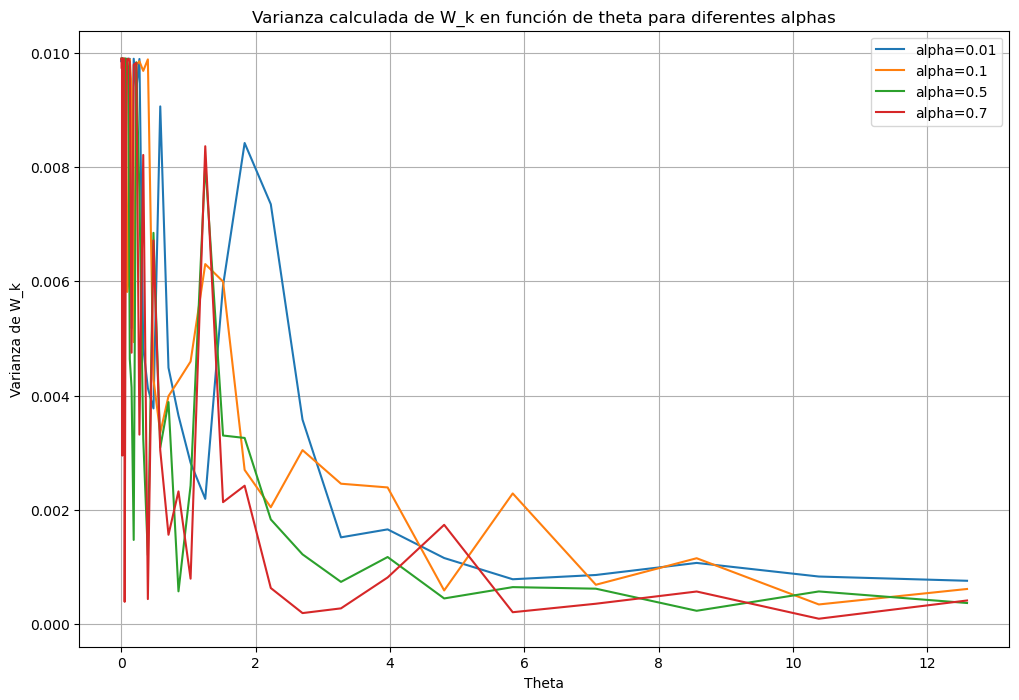

In [71]:
theta_values = np.logspace(-3, 1.1, 50)
n_max = 100

# Valores de alpha a considerar
alphas = [0.01, 0.1, 0.5, 0.7]

# Lista para almacenar las varianzas para cada alpha
variances = []

# Simular cadenas de W_k para valores variados de theta y alpha
plt.figure(figsize=(12, 8))

for alpha in alphas:
    Wk_chains = [simulate_Wk(n_max, alpha, theta, tol = 0, n_min=n_max) for theta in theta_values]
    Wk_variances = [np.var(Wk) for Wk in Wk_chains]
    variances.append(Wk_variances)
    plt.plot(theta_values, Wk_variances, label=f'alpha={alpha}')

plt.title(f'Varianza calculada de W_k en función de theta para diferentes alphas')
plt.xlabel('Theta')
plt.ylabel('Varianza de W_k')
plt.legend()
plt.grid()
plt.show()

Se comenta que para $\theta$ grande, la varianza de la serie es baja, mientras que para $\theta$ bajo, está es alta. Respecto al valor de $\alpha$, para $\alpha$ cercano a $1$ la varianza cae bruscamente mientras que para el resto de casos, parecen tener el mismo comportamiento.

## b) Usando la representación para la funciones $L^2$, genere un código que pueda generar funciones que satisfacen que:

### 1) Sean periódicas y pares en $L^2([-1,1])$.

Para esta parte considere la base ortonormal de $L^2([0,L])$ dada por:

$$
S = \left\{\sqrt{\frac{2}{L}}\cos\left(\frac{k\pi}{L}x\right)\right\}_{k=0}^\infty
$$

que se puede escribir en este caso de $L^2([-1,1])$ como:

$$
S = \left\{cos\left(\frac{k\pi}{2}(x+1)\right)\right\}_{k=0}^\infty
$$

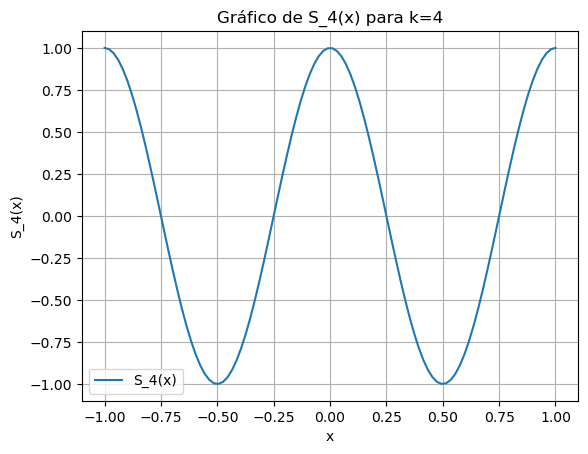

In [72]:
# Define el símbolo x
x = sp.symbols('x')

def periodic_base(k):
    """
    Generate the periodic base function S_k for a given k.

    Args:
        k (int): The parameter k for S_k.

    Returns:
        sympy expression: S_k(x) as a SymPy expression.
    """
    Sk = sp.cos(k * sp.pi / 2 * (x + 1))
    return Sk

# Ejemplo de uso
k = 4  # Cambia k al valor que desees
Sk = periodic_base(k)

# Convertir la expresión SymPy a una función numpy
Sk_function = sp.lambdify(x, Sk, 'numpy')

# Crear un array de valores de x
x_values = np.linspace(-1, 1, 100)

# Evaluar la función S_k en los valores de x
y_values = Sk_function(x_values)

# Graficar la función
plt.plot(x_values, y_values, label=f'S_{k}(x)')
plt.xlabel('x')
plt.ylabel(f'S_{k}(x)')
plt.title(f'Gráfico de S_{k}(x) para k={k}')
plt.grid(True)
plt.legend()
plt.show()

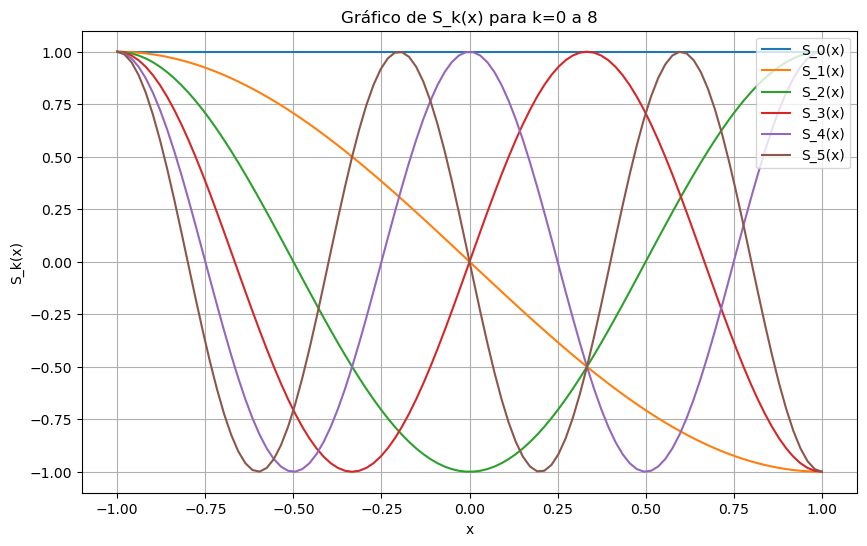

In [73]:
# Crear un array de valores de x
x_values = np.linspace(-1, 1, 100)

# Crear un gráfico para todas las funciones S_k(x)
plt.figure(figsize=(10, 6))

for k in range(6):  # Valores de k de 0 a 8
    Sk = periodic_base(k)
    if Sk == 1:
        y_values = np.ones(len(x_values))
    else:
        Sk_function = sp.lambdify(x, Sk, 'numpy')
        y_values = Sk_function(x_values)
    
    plt.plot(x_values, y_values, label=f'S_{k}(x)')

plt.xlabel('x')
plt.ylabel(f'S_k(x)')
plt.title('Gráfico de S_k(x) para k=0 a 8')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


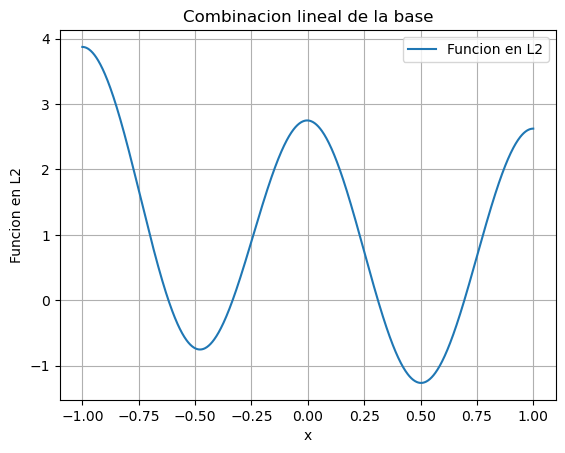

In [74]:
def calculate_weighted_sum(Wk):
    """
    Calculate the weighted sum of periodic functions for a given list of weights Wk.

    Args:
        Wk (list or numpy.ndarray): List of weights.

    Returns:
        sympy expression: The weighted sum of periodic functions.
    """
    n = len(Wk)
    weighted_sum = Wk[0] # Intercept
    for i in range(1, n):
        # Generar la función periódica f_i para n=i
        fi = periodic_base(i)
        # Sumar w_i * f_i al resultado
        weighted_sum += Wk[i] * fi
    return weighted_sum

# Ejemplo de uso
Wk = [1, 0.5, 0.25, 0.125, 2]  # Cambia los valores de Wk según sea necesario

# Calcular la suma ponderada de funciones periódicas
weighted_sum = calculate_weighted_sum(Wk)

# Convertir la expresión SymPy a una función numpy
weighted_sum_function = sp.lambdify(x, weighted_sum, 'numpy')

# Crear un array de valores de x
x_values = np.linspace(-1, 1, 1000)

# Evaluar la función ponderada en los valores de x
y_values = weighted_sum_function(x_values)

plt.plot(x_values, y_values, label='Funcion en L2')
plt.xlabel('x')
plt.ylabel('Funcion en L2')
plt.title('Combinacion lineal de la base')
plt.grid(True)
plt.legend()
plt.show()

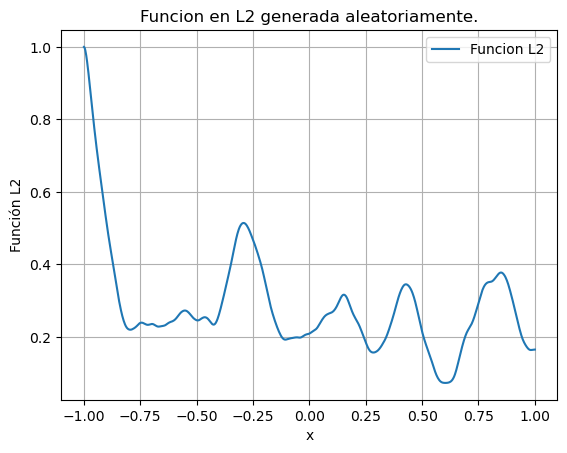

In [75]:
# Simular Wk con los valores de alpha y theta predefinidos
n_max = 500  # Tamaño máximo de la secuencia
alpha = 0.3  # Valor de alpha predefinido
theta = 5.0  # Valor de theta predefinido

Wk = simulate_Wk(n_max, alpha, theta)  # Cambia los valores de Wk según sea necesario

# Calcular la suma ponderada de funciones periódicas
weighted_sum = calculate_weighted_sum(Wk)

# Convertir la expresión SymPy a una función numpy
weighted_sum_function = sp.lambdify(x, weighted_sum, 'numpy')

# Crear un array de valores de x
x_values = np.linspace(-1, 1, 1000)

# Evaluar la función ponderada en los valores de x
y_values = weighted_sum_function(x_values)

plt.plot(x_values, y_values, label='Funcion L2')
plt.xlabel('x')
plt.ylabel('Función L2')
plt.title('Funcion en L2 generada aleatoriamente.')
plt.grid(True)
plt.legend()
plt.show()

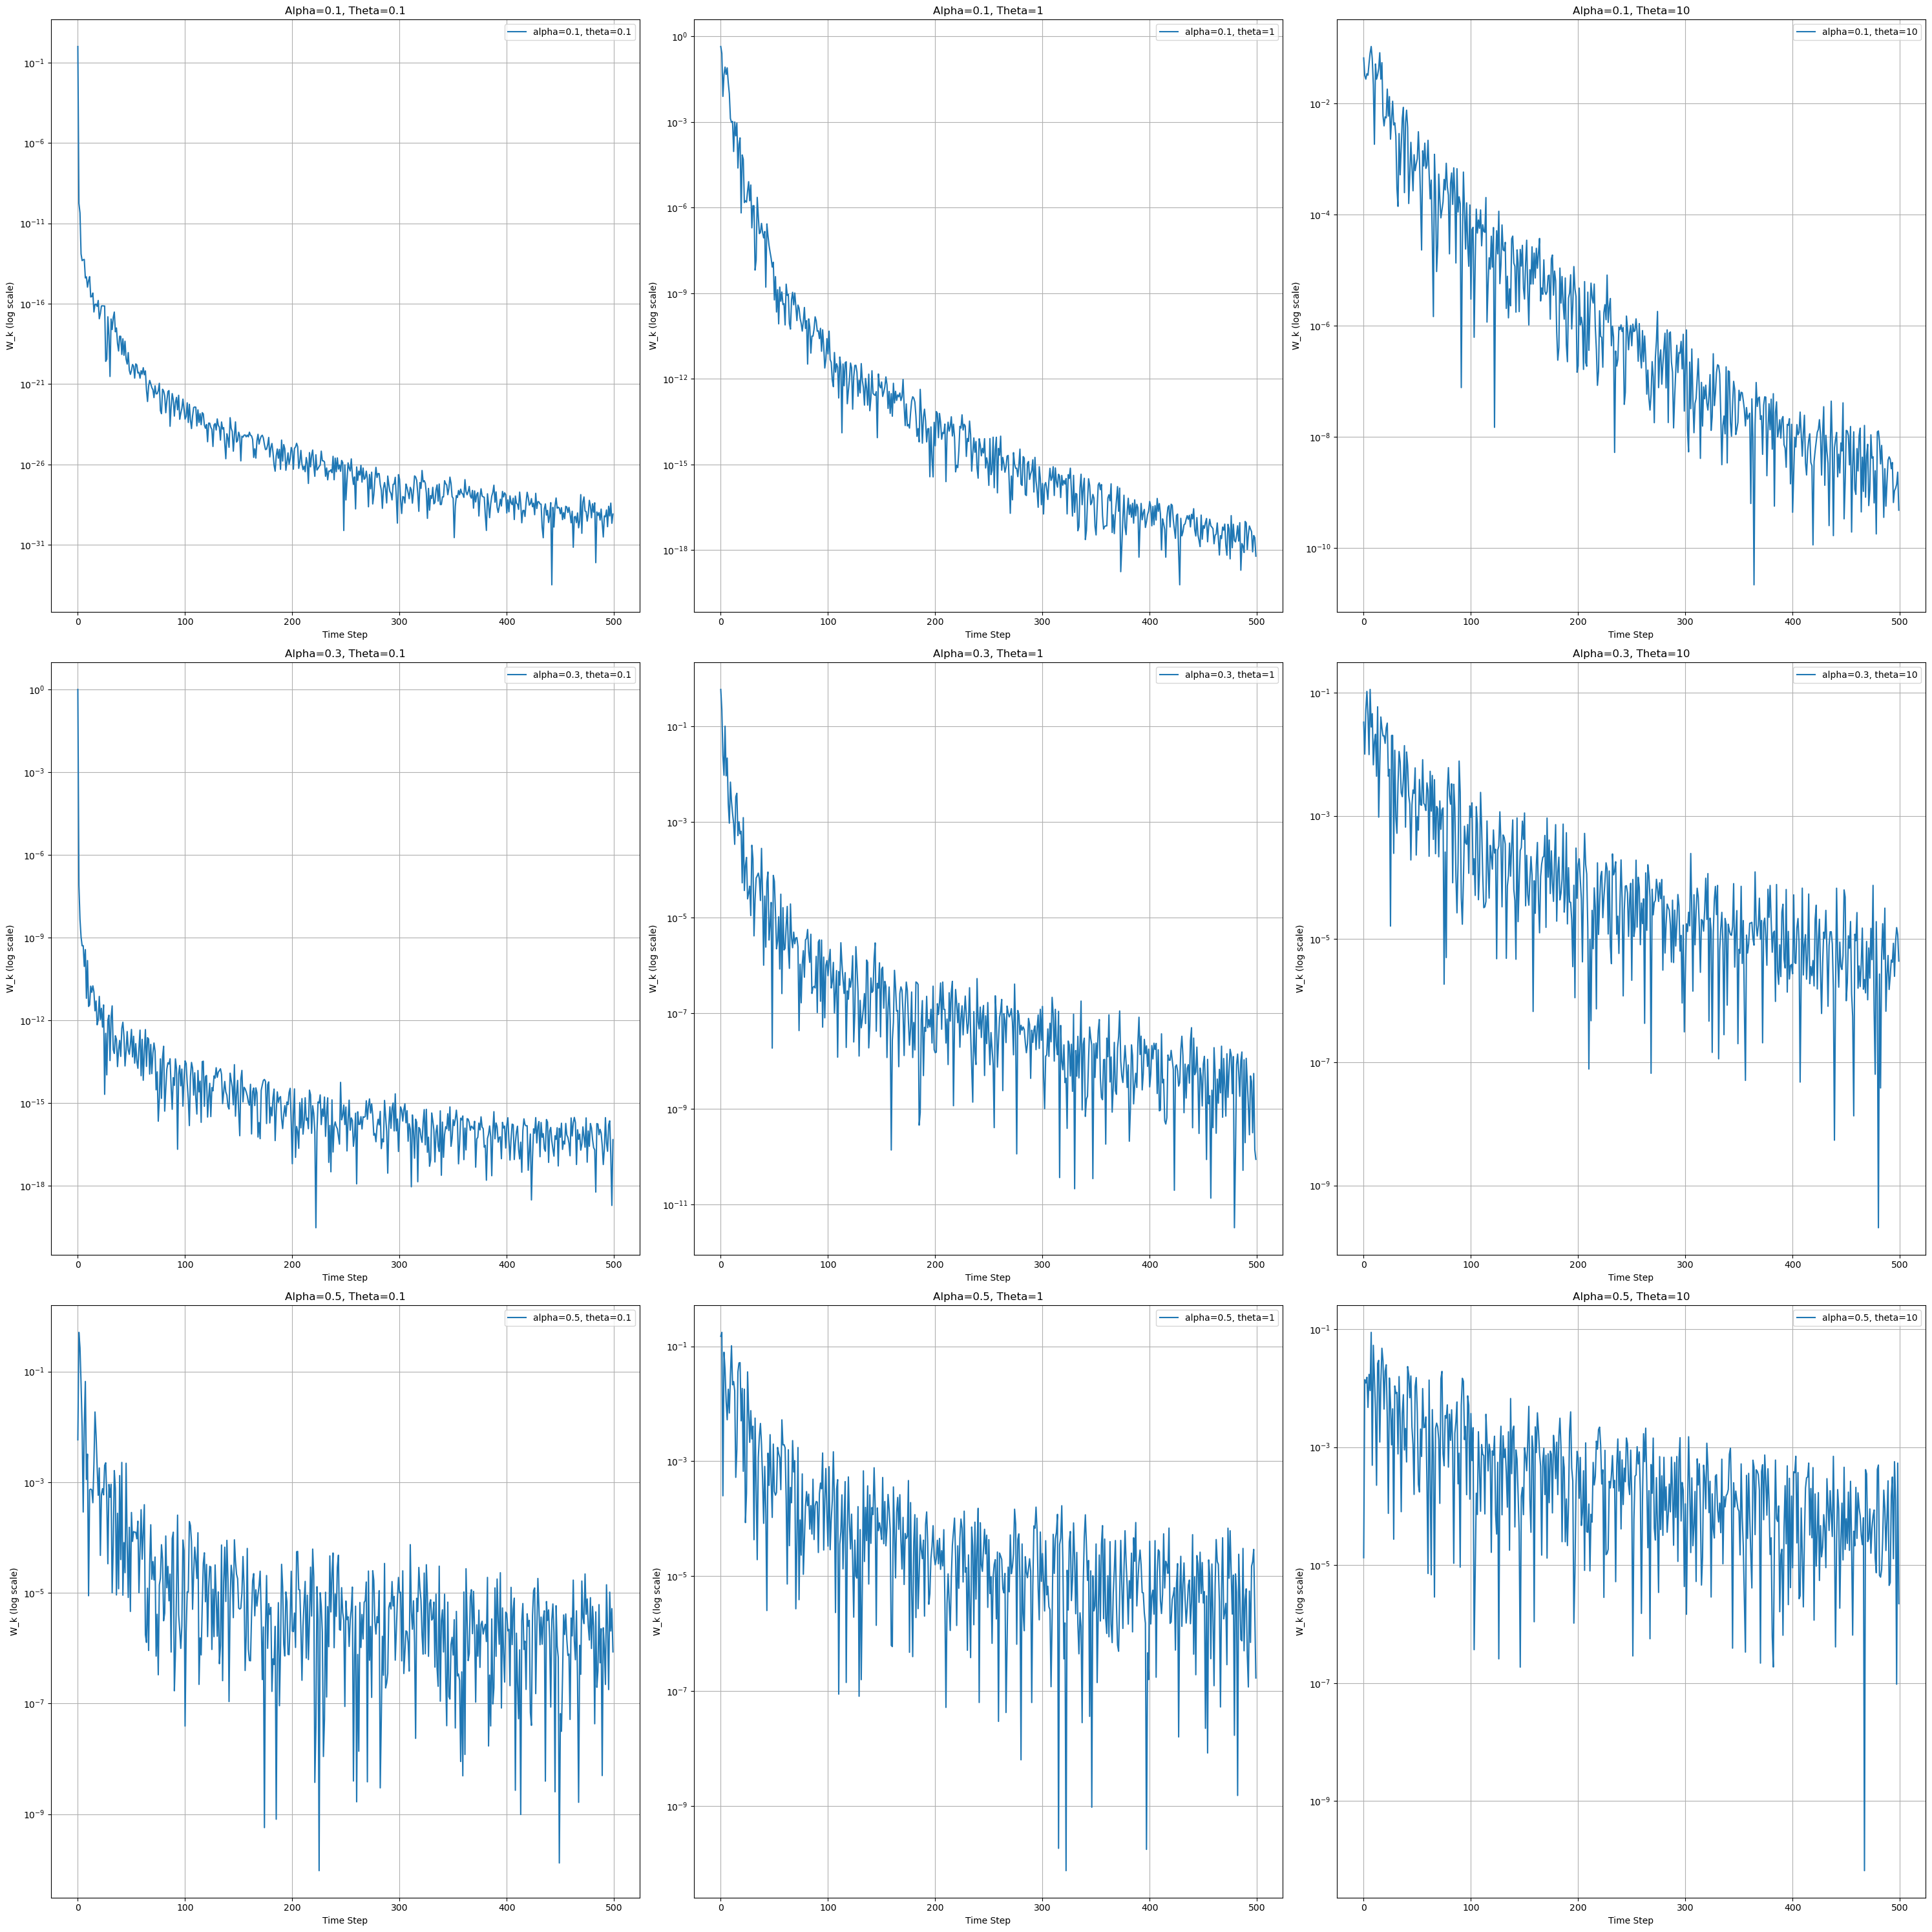

In [76]:
# Definir parámetros y configuración
n_max = 500  # Tamaño maximo de la serie de tiempo
# Valores de alpha y theta
alpha_values = [0.1, 0.3, 0.5]
theta_values = [0.1, 1, 10]

num_plots = len(alpha_values) * len(theta_values)  # Número total de gráficos

# Crear subplots para cada combinación de alpha y theta
fig, axes = plt.subplots(len(alpha_values), len(theta_values), figsize=(30, 30))

# Iterar a través de los valores de alpha y theta
for i, alpha in enumerate(alpha_values):
    for j, theta in enumerate(theta_values):
        # Simular la serie de tiempo utilizando simulate_Wk
        Wk = simulate_Wk(n_max, alpha, theta)
        if np.abs(np.sum(Wk)-1)>0.1: print(f'Warning, there is not convergence for {alpha=}, {theta=}')
        
        # Graficar la serie de tiempo en el subplot correspondiente
        ax = axes[i, j]
        ax.plot(np.arange(len(Wk)), Wk, label=f'alpha={alpha}, theta={theta}')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('W_k (log scale)')
        ax.set_yscale('log')  # Establecer escala logarítmica en el eje Y
        ax.set_title(f'Alpha={alpha}, Theta={theta}')
        ax.grid(True)
        ax.legend()

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

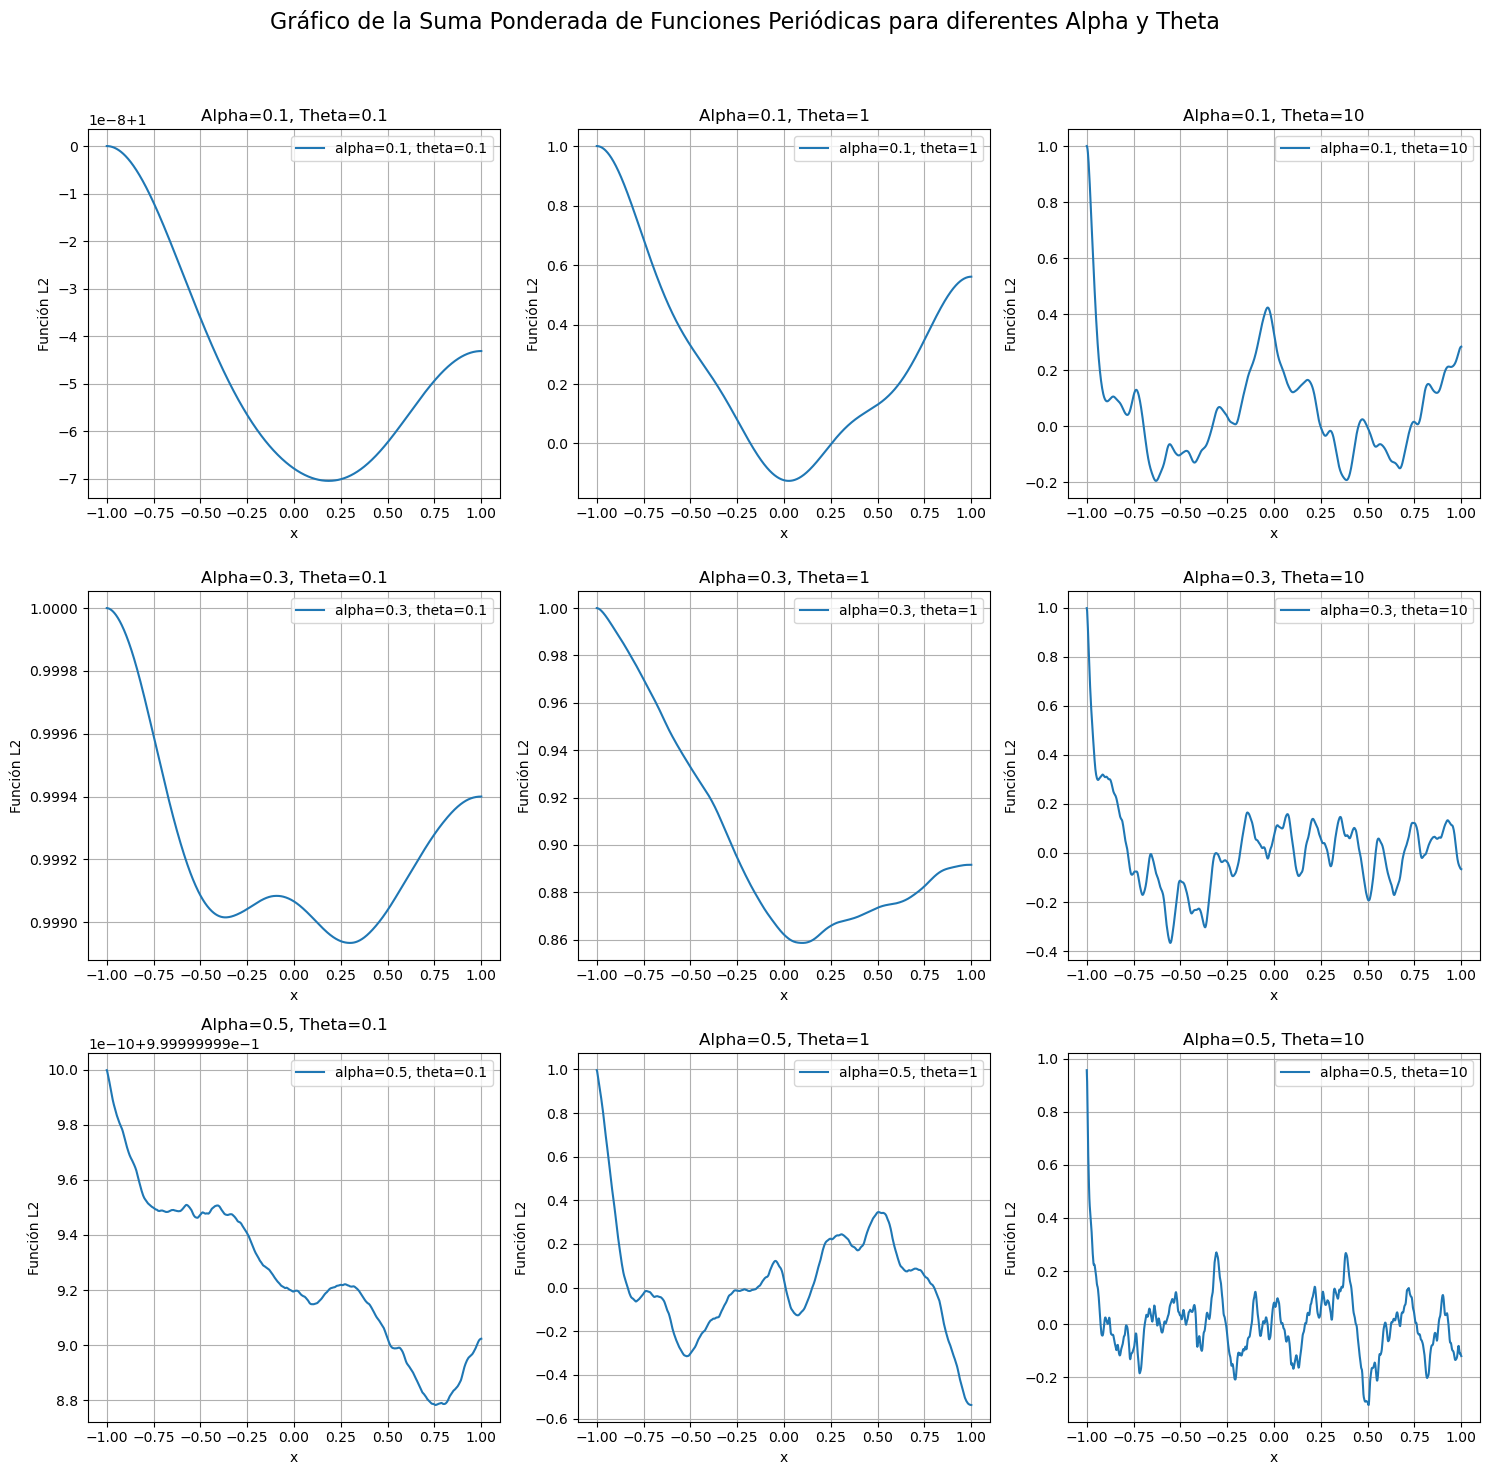

In [77]:
# Simular la suma ponderada de funciones para múltiples valores de alpha y theta
n_max = 500  # Tamaño máximo de la secuencia

# Valores de alpha y theta
alpha_values = [0.1, 0.3, 0.5]
theta_values = [0.1, 1, 10]

# Crear un array de valores de x
x_values = np.linspace(-1, 1, 1000)

# Crear subplots para cada combinación de alpha y theta
fig, axes = plt.subplots(len(alpha_values), len(theta_values), figsize=(15, 15))
fig.suptitle('Gráfico de la Suma Ponderada de Funciones Periódicas para diferentes Alpha y Theta', fontsize=16)

for i, alpha in enumerate(alpha_values):
    for j, theta in enumerate(theta_values):
        # Simular Wk con los valores de alpha y theta actuales
        Wk = simulate_Wk(n_max, alpha, theta)
        
        # Calcular la suma ponderada de funciones periódicas
        weighted_sum = calculate_weighted_sum(Wk)
        
        # Convertir la expresión SymPy a una función numpy
        weighted_sum_function = sp.lambdify(x, weighted_sum, 'numpy')

        # Evaluar la función ponderada en los valores de x
        y_values = weighted_sum_function(x_values)

        # Graficar la función ponderada en el subplot correspondiente
        ax = axes[i, j]
        ax.plot(x_values, y_values, label=f'alpha={alpha}, theta={theta}')
        ax.set_xlabel('x')
        ax.set_ylabel('Función L2')
        ax.set_title(f'Alpha={alpha}, Theta={theta}')
        ax.grid(True)
        ax.legend()

# Ajustar el espacio entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar los gráficos
plt.show()

> Recuerda mencionar el porqué son periodicas en L2.

### 2) Sean estríctamente crecientes en $L^2([0,1])$.

Ahora considere la misma base ortogonal anterior pero en el intervalo [0,1], esta es:
$$
S = \left\{cos\left(\frac{k\pi}{2}x\right)\right\}_{k=0}^\infty
$$

Sea $f(x)$ generada por el método anterior, por construcción es claro que $|f|\leq1$, por lo tanto $\exp(f(x))\leq e$ y por ende está en $L^2$. Note que $\exp(f(x))$ es una función estrictamente positiva, por lo tanto toda función $g$ tal que $g'(x)=\exp(f(x))$ es estrictamente creciente.

In [78]:
# Define el símbolo x
x = sp.symbols('x')

def periodic_base_01(k):
    """
    Generate the periodic base function S_k for a given k.

    Args:
        k (int): The parameter k for S_k.

    Returns:
        sympy expression: S_k(x) as a SymPy expression.
    """
    Sk = sp.cos(k * sp.pi / 2 * x)
    return Sk

def calculate_weighted_sum_01(Wk):
    """
    Calculate the weighted sum of periodic functions for a given list of weights Wk.

    Args:
        Wk (list or numpy.ndarray): List of weights.

    Returns:
        sympy expression: The weighted sum of periodic functions.
    """
    n = len(Wk)
    weighted_sum = Wk[0] # Intercept
    for i in range(1, n):
        # Generar la función periódica f_i para n=i
        fi = periodic_base_01(i)
        # Sumar w_i * f_i al resultado
        weighted_sum += Wk[i] * fi
    return weighted_sum


Use el siguiente procedimiento:
$$
g(x_i)=\int_0^{x_i}\exp(f(x))dx\approx\sum_{i=1}^nw_i^{(x_i)}\exp(f(x_i))
$$

In [87]:
# Simular Wk con los valores de alpha y theta predefinidos
n_max = 500  # Tamaño máximo de la secuencia
alpha = 0.3  # Valor de alpha predefinido
theta = 5.0  # Valor de theta predefinido

Wk = simulate_Wk(n_max, alpha, theta)  # Cambia los valores de Wk según sea necesario

print('1')

# Calcular la suma ponderada de funciones periódicas
weighted_sum = calculate_weighted_sum_01(Wk)

# Valor de x_i en el que deseas calcular la aproximación
x_i = 2.0  # Reemplaza con el valor deseado

# Número de nodos de cuadratura
n = 5  # Reemplaza con el número de nodos deseado

# Calcula los nodos y pesos de cuadratura de Gauss en el intervalo [0, x_i]
x_nodes, weights = np.polynomial.legendre.leggauss(n)
x_nodes = 0.5 * (x_nodes + 1) * x_i
weights = 0.5 * weights

# Inicializa la suma
approximation = 0

# Calcula la aproximación numérica de la integral g(x_i)
for i in range(n):
    approximation += weights[i] * np.exp(weighted_sum(x_nodes[i]))

print(f'La aproximación de g({x_i}) es: {approximation}')

1


TypeError: 'Add' object is not callable

In [85]:
# Simular Wk con los valores de alpha y theta predefinidos
n_max = 500  # Tamaño máximo de la secuencia
alpha = 0.3  # Valor de alpha predefinido
theta = 5.0  # Valor de theta predefinido

Wk = simulate_Wk(n_max, alpha, theta)  # Cambia los valores de Wk según sea necesario

print('1')

# Calcular la suma ponderada de funciones periódicas
weighted_sum = calculate_weighted_sum_01(Wk)

# Calcular la antiderivada de exp(weighted_sum)
# antiderivative = sp.integrate(sp.exp(weighted_sum), x)

import sympy as sp
from scipy.integrate import fixed_quad

# Definir la función a integrar
f = sp.exp(weighted_sum)

print('2')

# Límites de integración
a = 0
b = x  # Variable simbólica para la antiderivada

# Función de cuadratura gaussiana (ajusta la cantidad de puntos según sea necesario)
n_points = 50
x_nodes, weights = np.polynomial.legendre.leggauss(n_points)

print('3')

integral_approximation = sum([w * f.subs(x, x_node) for x_node, w in zip(x_nodes, weights)])

print('4')

# Antiderivada de la función
antiderivative = sp.integrate(integral_approximation, (x, a, b))

# Imprimir la antiderivada
print(f"Antiderivada de exp(weighted_sum): {antiderivative}")

1
2
3
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\diego\anaconda3\Lib\site-packages\sympy\core\assumptions.py", line 479, in getit
    return self._assumptions[fact]
           ~~~~~~~~~~~~~~~~~^^^^^^
KeyError: 'zero'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\diego\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\diego\AppData\Local\Temp\ipykernel_7208\2554551898.py", line 34, in <module>
    integral_approximation = sum([w * f.subs(x, x_node) for x_node, w in zip(x_nodes, weights)])
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\diego\AppData\Local\Temp\ipykernel_7208\2554551898.py", line 34, in <listcomp>
    integral_approximation = sum([w * f.subs(x, x_node) for x_node, w in zip(x_nodes, weights)])
                                

In [86]:
# Convertir la expresión SymPy a una función numpy
antiderivative_function = sp.lambdify(x, antiderivative, 'numpy')

# Crear un array de valores de x
x_values = np.linspace(0, 1, 1000)

# Evaluar la función ponderada en los valores de x
y_values = antiderivative_function(x_values)

plt.plot(x_values, y_values, label='Funcion L2')
plt.xlabel('x')
plt.ylabel('Función L2')
plt.title('Funcion en L2 generada aleatoriamente estrictamente creciente.')
plt.grid(True)
plt.legend()
plt.show()

NameError: name 'antiderivative' is not defined

### 3) Sean positivas e integren 1 en $L^2([0,1])$

> No existe una base que cumpla estas carácteristicas, dado que si dos funciones de la base son positivas, entonces su producto y por ende su integral es positiva.

Dadas funciones $f(x)$, por argumentos anteriores sabemos que $\exp(f(x))$ es positiva, luego basta usar
$$
g(x)=\frac{\exp(f(x))}{\int_{0}^1\exp(f(x))dx}
$$

In [81]:
import time

# Simular Wk con los valores de alpha y theta predefinidos
n_max = 100  # Tamaño máximo de la secuencia
alpha = 0.3  # Valor de alpha predefinido
theta = 5.0  # Valor de theta predefinido

# Registra el tiempo de inicio
inicio = time.time()

print(f'Ahora estamos simulando Wk: {time.time() - inicio:.2f}')

Wk = simulate_Wk(n_max, alpha, theta)  # Cambia los valores de Wk según sea necesario

print(f'Ahora estamos calculando weighted_sum: {time.time() - inicio:.2f}')

# Calcular la suma ponderada de funciones periódicas
weighted_sum = calculate_weighted_sum_01(Wk)

print(f'Ahora estamos calculando weighted_sum_function: {time.time() - inicio:.2f}')

# Convertir la expresión SymPy a una función numpy
weighted_sum_function = sp.lambdify(x, weighted_sum, 'numpy')

print(f'Ahora estamos calculando sp.exp(): {time.time() - inicio:.2f}')

# Calcular la antiderivada de exp(weighted_sum)
positive = sp.exp(weighted_sum)

print(f'Ahora estamos calculando la aproximacion: {time.time() - inicio:.2f}')

# Calcula la integral definida de f(x) desde 0 hasta 1 (demora mucho tiempo)
# result = sp.integrate(positive, (x, 0, 1))

# Parámetros de la aproximación
n = 100  # Número de puntos para la discretización

# Calcula el paso de discretización
dx = 1 / n

# Inicializa la suma
approximation = 0

# Realiza la sumatoria de los valores de la función
for i in range(n):
    print(f'Ahora estamos en la iteracion {i=} de la aproximacion: {time.time() - inicio:.2f}')
    xi = i * dx
    approximation += positive.subs(x, xi)

# Multiplica por el paso de discretización
approximation *= dx

print(f"Aproximación de la integral definida: {approximation}")

result = approximation

print(f'Ahora estamos dividiendo: {time.time() - inicio:.2f}')

# Hace que integre 1
positive = positive/result

Ahora estamos simulando Wk: 0.00
Ahora estamos calculando weighted_sum: 0.07
Ahora estamos calculando weighted_sum_function: 0.37
Ahora estamos calculando sp.exp(): 0.44
Ahora estamos calculando la aproximacion: 0.71
Ahora estamos en la iteracion i=0 de la aproximacion: 0.77
Ahora estamos en la iteracion i=1 de la aproximacion: 0.79
Ahora estamos en la iteracion i=2 de la aproximacion: 1.49
Ahora estamos en la iteracion i=3 de la aproximacion: 1.93
Ahora estamos en la iteracion i=4 de la aproximacion: 2.46
Ahora estamos en la iteracion i=5 de la aproximacion: 2.90
Ahora estamos en la iteracion i=6 de la aproximacion: 3.46
Ahora estamos en la iteracion i=7 de la aproximacion: 3.98
Ahora estamos en la iteracion i=8 de la aproximacion: 4.73
Ahora estamos en la iteracion i=9 de la aproximacion: 5.23
Ahora estamos en la iteracion i=10 de la aproximacion: 6.01
Ahora estamos en la iteracion i=11 de la aproximacion: 6.51
Ahora estamos en la iteracion i=12 de la aproximacion: 7.25
Ahora estamos

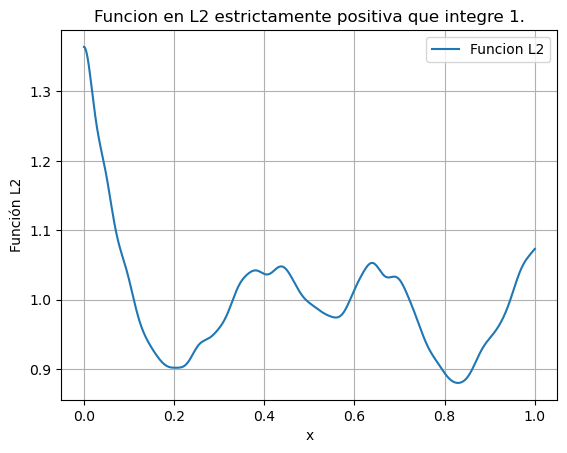

In [82]:
# Convertir la expresión SymPy a una función numpy
positive_function = sp.lambdify(x, positive, 'numpy')

# Crear un array de valores de x
x_values = np.linspace(0, 1, 1000)

# Evaluar la función ponderada en los valores de x
y_values = positive_function(x_values)

plt.plot(x_values, y_values, label='Funcion L2')
plt.xlabel('x')
plt.ylabel('Función L2')
plt.title('Funcion en L2 estrictamente positiva que integre 1.')
plt.grid(True)
plt.legend()
plt.show()